<a href="https://colab.research.google.com/github/YashviBhuwalka/Stock_Price_Prediction/blob/main/STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

In [ ]:
#Download Real-Time Stock Data
stock_symbol = "AAPL"  # Change this to any stock symbol
df = yf.download(stock_symbol, start="2010-01-01", end="2025-02-28")  # Fetch stock data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.sample(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-04-27,7.885730,8.060273,7.839989,8.043120,709343600
2018-02-22,40.701500,41.043628,40.515100,40.536335,123967600
2020-06-11,81.736542,85.425516,81.634345,84.999678,201662400
2012-07-17,18.265011,18.402238,18.150955,18.380870,293624800
2015-12-14,25.447472,25.492719,24.838886,25.379599,257274800


In [ ]:
df = df[['Close']]  # Use only closing prices

In [ ]:
df.head()

Price,Close
Ticker,AAPL
Date,
2010-01-04,6.440332
2010-01-05,6.451466
2010-01-06,6.348848
2010-01-07,6.337111
2010-01-08,6.379241


In [ ]:
df.tail()

Price,Close
Ticker,AAPL
Date,
2025-02-21,245.550003
2025-02-24,247.100006
2025-02-25,247.039993
2025-02-26,240.360001
2025-02-27,237.300003


In [ ]:
#Data Preprocessing: Normalize Data
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)

In [ ]:
#Function to Create Sequences
def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 50
X, y = create_sequences(df_scaled, time_steps)

In [ ]:
#Split Data into Training & Testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
#Build Bidirectional LSTM Model
model = Sequential([
    Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(time_steps, 1))),
    Dropout(0.3),
    Bidirectional(LSTM(units=100, return_sequences=False)),
    Dropout(0.3),
    Dense(units=50),
    Dense(units=1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
#Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 231ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - loss: 4.1085e-04 - val_loss: 8.8740e-04
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 41s 222ms/step - loss: 3.1655e-04 - val_loss: 8.1084e-04
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - loss: 3.0683e-04 - val_loss: 0.0028
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 40s 207ms/step - loss: 2.9172e-04 - val_loss: 7.9018e-04
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - loss: 2.9575e-04 - val_loss: 0.0023
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - loss: 2.5418e-04 - val_loss: 7.4855e-04
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - loss: 2.2310e-04 - val_loss: 0.0014
Epoch 9/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 39s 204ms/step - loss: 2.9921e-04 - val_loss: 9.1259e-04
Epoch 10/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - loss: 2.5324e-04 - val_loss: 0.0011
Epoch 11/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - loss: 2.3693e-04 

In [ ]:
#Save the Model
model.save("stock_bilstm_model.h5")

In [ ]:
#Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step


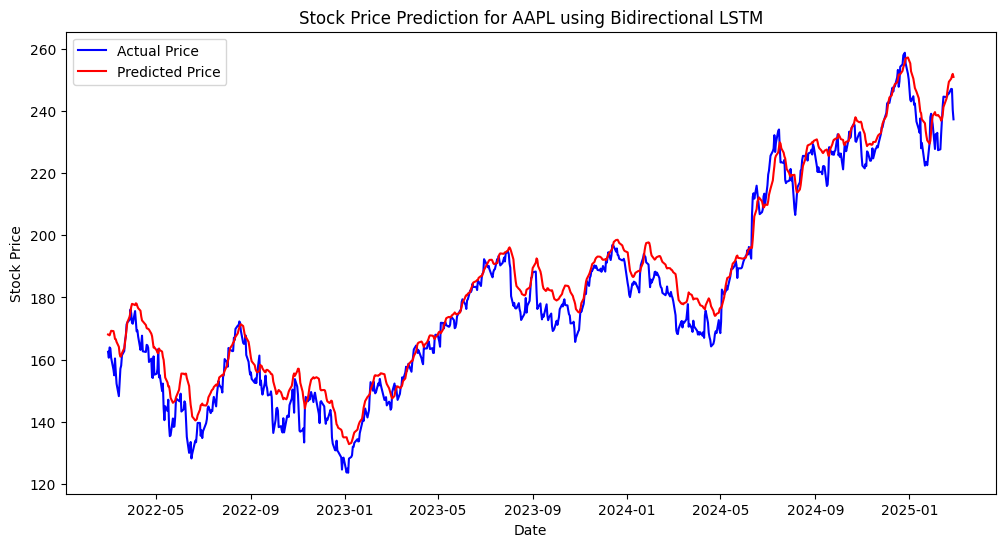

In [ ]:
#Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual Price", color='blue')
plt.plot(df.index[-len(predictions):], predictions, label="Predicted Price", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {stock_symbol} using Bidirectional LSTM")
plt.legend()
plt.show()

In [ ]:
!pip install streamlit yfinance numpy pandas matplotlib tensorflow scikit-learn pyngrok --quiet

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from datetime import timedelta

# Load the trained model
model = load_model("stock_bilstm_model.h5")

# Streamlit UI
st.title("📈 Real-Time Stock Price Prediction using Bidirectional LSTM")

# Sidebar: Select Stock Symbol
stock_symbol = st.sidebar.text_input("Enter Stock Symbol", "AAPL")

# Fetch Real-Time Stock Data
df = yf.download(stock_symbol, start="2015-01-01")
df = df[['Close']]  # Use only closing prices

# Get the latest available date
latest_date = df.index[-1]

# Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)

# Function to create sequences
def create_sequences(data, time_steps=50):
    X = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
    return np.array(X)

# Prepare data for prediction
time_steps = 50
X_pred = create_sequences(df_scaled, time_steps)
X_pred = X_pred[-1:]  # Use last sequence for prediction

# Predict Future Price
predicted_price = model.predict(X_pred)
predicted_price = scaler.inverse_transform(predicted_price)[0][0]

# Convert predicted date to Pandas Timestamp for plotting
predicted_date = latest_date + timedelta(days=1)  # Next trading day

# Show results with dates
st.write(f"📊 **Latest Closing Price of {stock_symbol} ({latest_date.strftime('%Y-%m-%d')}):** ${df['Close'].iloc[-1].item():,.2f}")
st.write(f"📈 **Predicted Stock Price for {predicted_date.strftime('%Y-%m-%d')}:** ${float(predicted_price):,.2f}")

# Plot Actual vs Predicted Prices
st.subheader("📉 Actual vs. Predicted Stock Prices")
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label="Actual Price", color='blue')
plt.axvline(x=latest_date, color='gray', linestyle="--", label="Prediction Point")  # Mark the prediction point
plt.scatter(predicted_date, predicted_price, color='red', marker='o', label="Predicted Price")  # Mark predicted price
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.legend()
st.pyplot(plt)

Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null &

In [ ]:
from pyngrok import ngrok

# Kill any running ngrok processes (to avoid conflicts)
!pkill -f ngrok
!ngrok authtoken 2tINakUcE70pQPXsxYQ11EPT8a3_eeCaUnpkP8gE8W45DVu2
# Expose the Streamlit app running on port 8501
public_url = ngrok.connect(8501, "http")
print(f"Public URL: {public_url}")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://a991-34-48-69-69.ngrok-free.app" -> "http://localhost:8501"
